# Semana 4

## FSC5705 - Física Computacional
## 30/08/2023

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Questão 1

Considere a equação

$$
x = 1 - \mathrm{e}^{-cx},
$$

onde $c$ é um parâmetro conhecido e $x$ desconhecido. Esta equação surge em diversas situações, incluindo na física de processos de contato.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**a.** Resolva esta equação para $x$ usando o método do ponto fixo, no caso em que $c = 2$. Estime a solução com uma precisão de $10^{-6}$.

In [3]:
def f(x,c):
    return (1 - np.exp(-c*x))

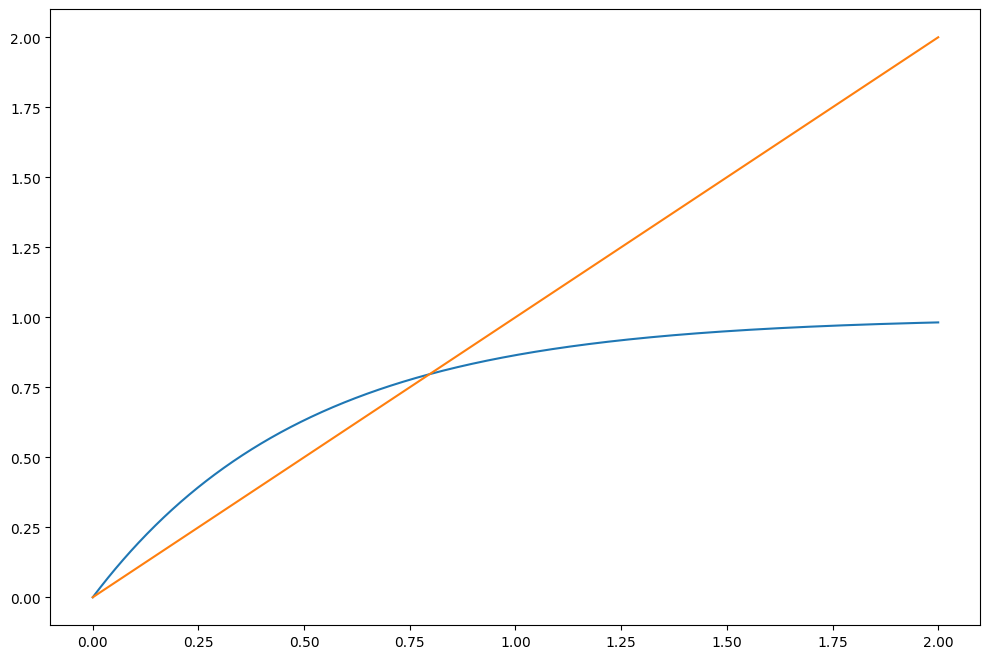

In [4]:
fig, ax = plt.subplots(1,1,figsize = (12,8))

x = np.linspace(0,2,1000)
ax.plot(x,f(x,2))
ax.plot(x,x)

In [5]:
N = 1000
x1 = 2
epsilon = 1e-6
delta1 = 0.0

for i in range(N):
    x2 = f(x1,2)
    
    delta2 = x2 - x1
    epsilon2 = delta2**2 / (delta2 - delta1)
    
    if np.abs(epsilon2) < epsilon:
        break
        
    else:
        x1 = x2
        delta1 = delta2
    
print(x2)

0.79681259749295


**b.** Calcule a solução agora variando $c$ entre $0$ e $3$, em passos de $0.01$. Faça um gráfico de $x$ em função de $c$. Você deverá ver uma transição clara entre um regime em que $x = 0$ e outro em que $x \neq 0$. Este é um exemplo importante de transição de fase – na Física, esta transição é conhecida como *transição de percolação*.

*Nota: é possível que em alguns pontos a equação demore bastante para convergir. Use um $N$ grande o suficiente para que a curva não apresente descontinuidades (exceto a própria transição de fase).*

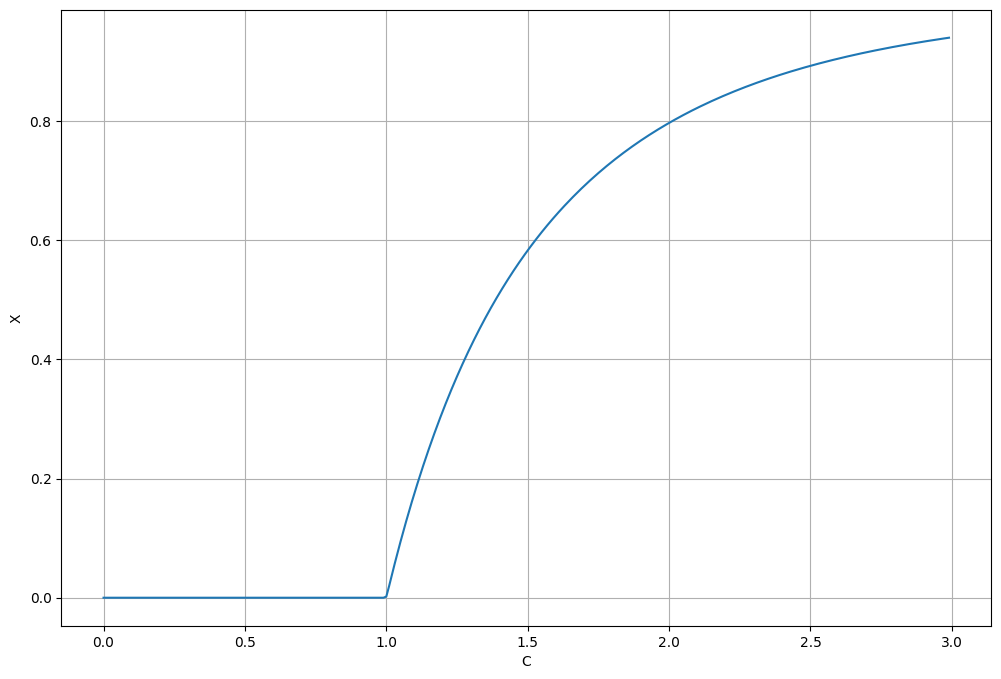

In [6]:
def solucao(c):
    N = 1000
    x1 = 2
    epsilon = 1e-6
    delta1 = 0.0

    for i in range(N):
        x2 = f(x1,c)

        delta2 = x2 - x1
        epsilon2 = delta2**2 / (delta2 - delta1)

        if np.abs(epsilon2) < epsilon:
            break

        else:
            x1 = x2
            delta1 = delta2
    
    return x2

C = np.arange(0,3,0.01)
X = np.zeros(len(C))

for i in range(len(C)):
    
    x = solucao(C[i])
    X[i] = x
    
    
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(C,X)
ax.set_xlabel("C")
ax.set_ylabel("X")
ax.grid()

### Questão 2

Existe um ponto entre a Terra e a Lua, chamado *Ponto lagrangiano* $L_1$, onde um satélite orbita a Terra em perfeita sincronia com a Lua, permanecendo exatamente entre as duas. Isso acontece porque as atrações gravitacionais da Terra e da Lua se combinam para criar exatamente a aceleração centrípeta necessária para um movimento circular com mesmo período do da Lua. Considere a figura abaixo.

[Mark Newman, Computational Physics](http://www-personal.umich.edu/~mejn/cp/)

![Local do ponto Lagrangeano L1 no sistema Terra-Lua.](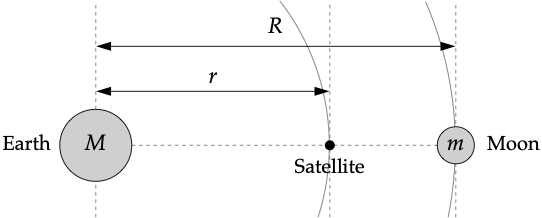
)

Vamos supor órbitas circulares e coplanares, com a Terra muito mais massiva que a Lua e o satélite (Terra parada no centro das órbitas). A distância $r$ do centro da Terra até o ponto $L_1$, neste caso, é dada pela equação

$$
\frac{GM}{r^2} - \frac{Gm}{(R - r)^2} = \omega^2 r,
$$

onde $\omega$ é a velocidade angular do movimento circular.

Podemos calcular facilmente $\omega$ considerando apenas o movimento da Lua. Se a sua aceleração centrípeta é devida à aceleração da gravidade,

\begin{align}
\omega^2 R &= \frac{GM}{R^2} \\
\omega^2 &= \frac{GM}{R^3}.
\end{align}

**a.** Expresse a equação acima de forma a poder aplicar o método de Newton. Lembre que vai ser necessário calcular a derivada da função, então capriche nas simplificações! Quantidades envolvidas:

- $G = 6.67430 \times 10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-1}$
- $R = 3.844 \times 10^8$
- $M = 5.972168 \times 10^{24}\,\mathrm{kg}$
- $m = 7.342 \times 10^{22}\,\mathrm{kg}$

Faça o gráfico da função, e verifique se a solução existe.

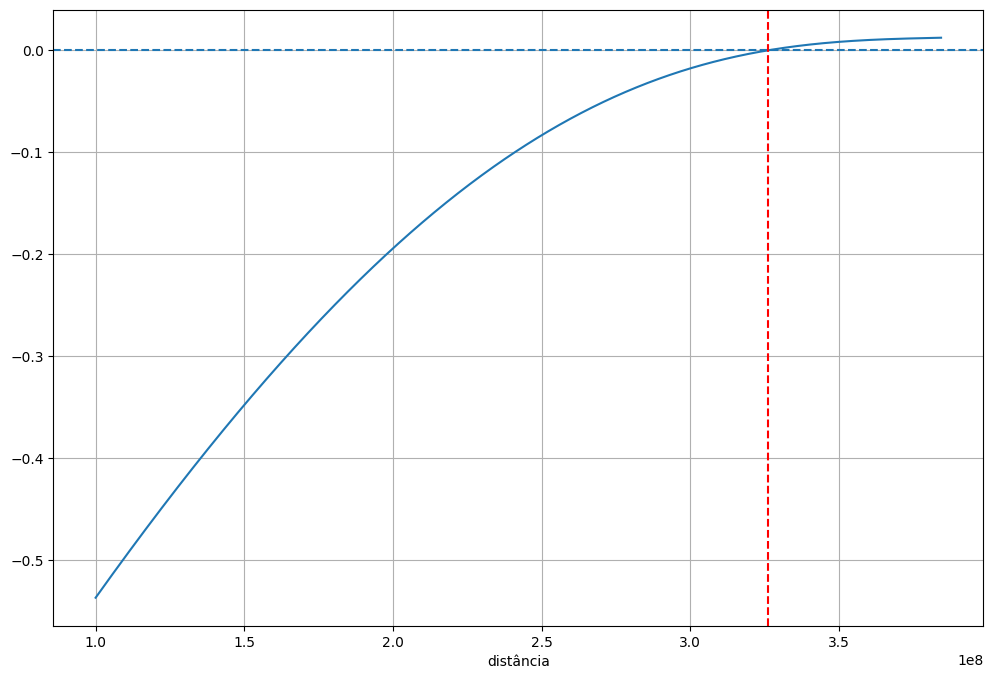

In [7]:
def g(r):
    G = 6.67430e-11
    R = 3.844e8
    M = 5.972168e24
    m = 7.342e22
    
    rho = r/R
    mi = m/M
    
    return rho**5 - 2*rho**4 + rho**3 - (1-mi)*rho**2 + 2*rho - 1
    # return (G*M/(r**2)) - (G*m/(R-r)**2) - (G*M*r/(R**3))

r = np.linspace(1e8,3.844e8,1000)

fig, ax = plt.subplots(1,1,figsize = (12,8))

ax.plot(r,g(r))
ax.axhline(0,ls="--")
ax.set_xlabel("distância")
ax.grid()
ax.axvline(326327694.034913, ls="--", color = "red")

**b.** Use o método de Newton para encontrar a solução, com uma precisão de pelo menos 4 algarismos significativos. Compare com o valor calculado usando o centro de massa do sistema, $L_1 = 326.39 \times 10^3\,\mathrm{km}$.

In [8]:
def g_linha(r):
    
    G = 6.67430e-11
    R = 3.844e8
    M = 5.972168e24
    m = 7.342e22
    
    rho = r/R
    mi = m/M
    
    return (5*rho**4 - 8*rho**3 + 3*rho**2 - (1-mi)*2*rho + 2)/R

In [9]:
r1 = 3e8

epsilon = 1e-4

N = 1000

for i in range(N):
    
    r2 = r1 - (g(r1)/g_linha(r1))
    delta = r2-r1
    r1=r2
    
    if np.abs(delta) < epsilon:
        break
        
print(f"Ponto Lagrangeano : {r2/1e6}")

Ponto Lagrangeano : 326.327694034913


In [10]:
a = 3e8
b = 3.5e8
delta = np.abs(b-a)
epsilon = 1e-4

while delta > epsilon:

    xn = (a+b)/2

    if g(a) * g(xn) < 0:
        b = xn
    
    else:
        a = xn

    delta = np.abs(b-a)

print(xn/1e6)

326.32769403489874
